Aleksandra Bednarczuk

# Predictors of elderly citizens willingness to stay in the neighbourhood
# Logistic regression

Missing values ("I DON'T KNOW") replaced with most common answer (mode) or with the most neutral answer (e.g. "NORMAL" or "IT IS THE SAME").

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
from imblearn.over_sampling import SMOTE

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import r2_score

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

from scipy import stats

In [3]:
data = pd.read_pickle("survey_transformed2.pkl")

In [4]:
data.head()

,ANY,NOM_DISTRICTE,Would_not_stay_in_the_neighborhood,Gender,Time_living_in_barri,Barri_evolution2,Barri_future2,Barri_satisfaction_of_living,Barri_comparison2,GARBAGE COLLECTION,...,Social_class2,Living_alone,BCN_evolution2,BCN_future2,BCN_satisfaction_of_living,BCN_transport,BCN_over_barri_evolution2,BCN_over_barri_future2,BCN_over_barri_satisfaction_of_living,BCN_over_barri_transport
0,2011,EIXAMPLE,0.0,1,MORE THAN 10 YEARS,IT IS WORSE,IT WILL GET WORSE,NOT SATISFIED,"NEITHER THE BEST, NOR THE WORST",GOOD,...,MIDDLE-HIGH,1,IT IS WORSE,IT WILL GET WORSE,SATISFIED,GOOD,0,0,1,0
1,2011,EIXAMPLE,0.0,1,MORE THAN 10 YEARS,IT IS THE SAME,IT WILL STAY THE SAME,SATISFIED,"NEITHER THE BEST, NOR THE WORST",BAD,...,MIDDLE-MIDDLE,0,IT IS WORSE,IT WILL GET WORSE,SATISFIED,NORMAL,0,0,0,0
2,2011,EIXAMPLE,0.0,1,MORE THAN 10 YEARS,IT IS WORSE,IT WILL STAY THE SAME,SATISFIED,"NEITHER THE BEST, NOR THE WORST",GOOD,...,MIDDLE-MIDDLE,1,IT IS THE SAME,IT WILL IMPROVE,SATISFIED,GOOD,1,1,0,0
3,2011,EIXAMPLE,0.0,1,LESS THAN 10 YEARS,IT IS WORSE,IT WILL GET WORSE,SATISFIED,ONE OF THE BEST,GOOD,...,MIDDLE-MIDDLE,1,IT IS WORSE,IT WILL STAY THE SAME,SATISFIED,GOOD,0,1,0,0
4,2011,EIXAMPLE,1.0,0,MORE THAN 10 YEARS,IT IS THE SAME,IT WILL STAY THE SAME,NOT SATISFIED,"NEITHER THE BEST, NOR THE WORST",BAD,...,MIDDLE-LOW,0,IT IS THE SAME,IT WILL STAY THE SAME,SATISFIED,NORMAL,0,0,1,0


In [5]:
data.shape

(6245, 35)

In [6]:
data.columns.tolist()

['ANY',
 'NOM_DISTRICTE',
 'Would_not_stay_in_the_neighborhood',
 'Gender',
 'Time_living_in_barri',
 'Barri_evolution2',
 'Barri_future2',
 'Barri_satisfaction_of_living',
 'Barri_comparison2',
 'GARBAGE COLLECTION',
 'STREETS CLEANING',
 'GREEN AREAS',
 'PUBLIC LIGHTING',
 'ASPHALT AND STREET CONSERVATION',
 'FACADES AND BUILDING CONSERVATION',
 'CIRCULATION',
 'BUS',
 'MUNICIPAL POLICE',
 'CITIZEN SECURITY IN THE CITY AS A WHOLE',
 'CITIZEN SECURITY IN THE NEIGHBORHOOD',
 'MUNICIPAL MARKETS',
 'Barri_transport',
 'Owns_a_car',
 'House_size2',
 'Monthly_family_income2',
 'Social_class2',
 'Living_alone',
 'BCN_evolution2',
 'BCN_future2',
 'BCN_satisfaction_of_living',
 'BCN_transport',
 'BCN_over_barri_evolution2',
 'BCN_over_barri_future2',
 'BCN_over_barri_satisfaction_of_living',
 'BCN_over_barri_transport']

In [7]:
x_var = data.columns.tolist()

In [8]:
for i in ['ANY', 'NOM_DISTRICTE', 'Would_not_stay_in_the_neighborhood',
          'BCN_evolution2', 'BCN_future2', 'BCN_satisfaction_of_living', 'BCN_transport']:
    x_var.remove(i)

In [9]:
x = data[x_var]

In [10]:
y = data['Would_not_stay_in_the_neighborhood']

In [11]:
x = pd.get_dummies(x, drop_first = True)

In [12]:
logit_model = sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.301876
         Iterations 7
                                       Results: Logit
Model:                 Logit                                 Pseudo R-squared:    0.171      
Dependent Variable:    Would_not_stay_in_the_neighborhood    AIC:                 3850.4288  
Date:                  2021-04-14 08:40                      BIC:                 4120.0103  
No. Observations:      6245                                  Log-Likelihood:      -1885.2    
Df Model:              39                                    LL-Null:             -2274.7    
Df Residuals:          6205                                  LLR p-value:         2.3381e-138
Converged:             1.0000                                Scale:               1.0000     
No. Iterations:        7.0000                                                                
--------------------------------------------------------------------------------------------

In [13]:
result.pvalues.sort_values(ascending=False)

GARBAGE COLLECTION_GOOD                         9.701419e-01
FACADES AND BUILDING CONSERVATION_GOOD          9.380965e-01
CIRCULATION_GOOD                                8.873053e-01
Barri_transport_GOOD                            8.332137e-01
Barri_evolution2_IT IS THE SAME                 8.109227e-01
Owns_a_car                                      7.482489e-01
Barri_evolution2_IT IS WORSE                    7.226733e-01
ASPHALT AND STREET CONSERVATION_GOOD            7.158719e-01
MUNICIPAL POLICE_GOOD                           6.927672e-01
PUBLIC LIGHTING_GOOD                            6.187034e-01
Monthly_family_income2_2001-3000 EUROS          5.297034e-01
MUNICIPAL MARKETS_GOOD                          5.267684e-01
BCN_over_barri_evolution2                       5.193481e-01
Gender                                          5.047996e-01
House_size2_> 150 M2                            4.444842e-01
House_size2_< 50 M2                             4.296742e-01
BCN_over_barri_future2  

In [14]:
for i in ['GARBAGE COLLECTION', 'FACADES AND BUILDING CONSERVATION', 'CIRCULATION', 'Barri_evolution2', 'Barri_transport',
         'ASPHALT AND STREET CONSERVATION', 'Owns_a_car']:
    x_var.remove(i)

In [15]:
x = data[x_var]
x = pd.get_dummies(x, drop_first = True)

In [16]:
logit_model = sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.302065
         Iterations 7
                                       Results: Logit
Model:                 Logit                                 Pseudo R-squared:    0.171      
Dependent Variable:    Would_not_stay_in_the_neighborhood    AIC:                 3834.7921  
Date:                  2021-04-14 08:40                      BIC:                 4043.7177  
No. Observations:      6245                                  Log-Likelihood:      -1886.4    
Df Model:              30                                    LL-Null:             -2274.7    
Df Residuals:          6214                                  LLR p-value:         5.0566e-144
Converged:             1.0000                                Scale:               1.0000     
No. Iterations:        7.0000                                                                
--------------------------------------------------------------------------------------------

In [17]:
result.pvalues.sort_values(ascending=False)

MUNICIPAL POLICE_GOOD                           6.409816e-01
Gender                                          5.932299e-01
PUBLIC LIGHTING_GOOD                            5.905925e-01
MUNICIPAL MARKETS_GOOD                          5.362574e-01
Monthly_family_income2_2001-3000 EUROS          5.203357e-01
House_size2_< 50 M2                             4.455901e-01
House_size2_> 150 M2                            4.447979e-01
BCN_over_barri_evolution2                       4.080209e-01
BCN_over_barri_future2                          2.937288e-01
STREETS CLEANING_GOOD                           2.922301e-01
House_size2_51-100 M2                           2.113674e-01
BUS_GOOD                                        1.515296e-01
Monthly_family_income2_> 3000 EUROS             1.446077e-01
Barri_future2_IT WILL IMPROVE                   8.765838e-02
Barri_future2_IT WILL STAY THE SAME             7.192402e-02
GREEN AREAS_GOOD                                5.757323e-02
CITIZEN SECURITY IN THE 

In [18]:
for i in ['PUBLIC LIGHTING', 'MUNICIPAL POLICE', 'Gender', 'MUNICIPAL MARKETS', 'House_size2']:
    x_var.remove(i)

In [19]:
x = data[x_var]
x = pd.get_dummies(x, drop_first = True)

In [20]:
logit_model = sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.302294
         Iterations 7
                                       Results: Logit
Model:                 Logit                                 Pseudo R-squared:    0.170      
Dependent Variable:    Would_not_stay_in_the_neighborhood    AIC:                 3823.6580  
Date:                  2021-04-14 08:40                      BIC:                 3985.4069  
No. Observations:      6245                                  Log-Likelihood:      -1887.8    
Df Model:              23                                    LL-Null:             -2274.7    
Df Residuals:          6221                                  LLR p-value:         1.2832e-148
Converged:             1.0000                                Scale:               1.0000     
No. Iterations:        7.0000                                                                
--------------------------------------------------------------------------------------------

In [21]:
result.pvalues.sort_values(ascending=False)

Monthly_family_income2_2001-3000 EUROS          5.667020e-01
BCN_over_barri_evolution2                       4.288722e-01
BCN_over_barri_future2                          2.993038e-01
STREETS CLEANING_GOOD                           2.622114e-01
Monthly_family_income2_> 3000 EUROS             1.771938e-01
BUS_GOOD                                        1.385845e-01
Barri_future2_IT WILL IMPROVE                   8.982199e-02
Barri_future2_IT WILL STAY THE SAME             7.474378e-02
CITIZEN SECURITY IN THE CITY AS A WHOLE_GOOD    4.888697e-02
Social_class2_MIDDLE-HIGH                       4.770035e-02
GREEN AREAS_GOOD                                4.689257e-02
Monthly_family_income2_< 1000 EUROS             4.652931e-02
Social_class2_MIDDLE-LOW                        3.057552e-02
Living_alone                                    2.892963e-02
BCN_over_barri_satisfaction_of_living           2.503425e-02
Social_class2_LOW                               2.451589e-02
Social_class2_MIDDLE-MID

In [22]:
for i in ['Monthly_family_income2', 'BCN_over_barri_evolution2', 'BCN_over_barri_future2', 
          'STREETS CLEANING', 'Living_alone']:
    x_var.remove(i)

In [23]:
x = data[x_var]
x = pd.get_dummies(x, drop_first = True)

In [24]:
logit_model = sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.303261
         Iterations 7
                                       Results: Logit
Model:                 Logit                                 Pseudo R-squared:    0.167      
Dependent Variable:    Would_not_stay_in_the_neighborhood    AIC:                 3821.7358  
Date:                  2021-04-14 08:40                      BIC:                 3936.3080  
No. Observations:      6245                                  Log-Likelihood:      -1893.9    
Df Model:              16                                    LL-Null:             -2274.7    
Df Residuals:          6228                                  LLR p-value:         9.9088e-152
Converged:             1.0000                                Scale:               1.0000     
No. Iterations:        7.0000                                                                
--------------------------------------------------------------------------------------------

In [25]:
result.pvalues.sort_values(ascending=False)

BUS_GOOD                                        1.030236e-01
Barri_future2_IT WILL STAY THE SAME             7.368834e-02
Social_class2_MIDDLE-HIGH                       5.870802e-02
CITIZEN SECURITY IN THE CITY AS A WHOLE_GOOD    4.641031e-02
BCN_over_barri_satisfaction_of_living           2.746575e-02
GREEN AREAS_GOOD                                2.287038e-02
Barri_future2_IT WILL IMPROVE                   1.608119e-02
Social_class2_MIDDLE-LOW                        1.425607e-02
Social_class2_MIDDLE-MIDDLE                     1.291664e-02
CITIZEN SECURITY IN THE NEIGHBORHOOD_GOOD       1.109433e-02
Social_class2_LOW                               7.023686e-03
Time_living_in_barri_MORE THAN 10 YEARS         4.532081e-03
BCN_over_barri_transport                        1.876504e-03
Barri_satisfaction_of_living_SATISFIED          2.934228e-07
Barri_comparison2_ONE OF THE WORST              3.446756e-09
Time_living_in_barri_LESS THAN 10 YEARS         4.427776e-10
Barri_comparison2_ONE OF

In [26]:
print(result.get_margeff().summary())

                Logit Marginal Effects               
Dep. Variable:     Would_not_stay_in_the_neighborhood
Method:                                          dydx
At:                                           overall
                                                  dy/dx    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
BCN_over_barri_satisfaction_of_living            0.0377      0.017      2.207      0.027       0.004       0.071
BCN_over_barri_transport                         0.0337      0.011      3.112      0.002       0.012       0.055
Time_living_in_barri_LESS THAN 10 YEARS          0.1097      0.018      6.258      0.000       0.075       0.144
Time_living_in_barri_MORE THAN 10 YEARS          0.0359      0.013      2.839      0.005       0.011       0.061
Barri_future2_IT WILL IMPROVE                   -0.0249      0.010     -2.409      0.016      -0.045      

In [27]:
result.pred_table()

array([[5438.,   66.],
       [ 633.,  108.]])

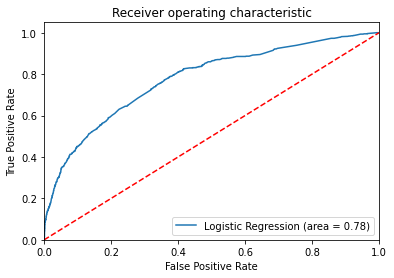

In [28]:
logit_roc_auc = roc_auc_score(y, result.predict(x))
fpr, tpr, thresholds = roc_curve(y, result.predict(x))
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()